In [2]:
pip install scikit-fuzzy

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 920.8/920.8 kB 10.1 MB/s eta 0:00:00


In [38]:
import numpy as np
import skfuzzy as fuzz
from skfuzzy import control as ctrl

In [4]:
hrate=ctrl.Antecedent(np.arange(0,130.1,0.1),'Heart Rate')
bpres=ctrl.Antecedent(np.arange(50, 180.1, 0.1), 'Blood Pressure')
temp=ctrl.Antecedent(np.arange(0,40.1,0.1),'Body Temperature')
oxys=ctrl.Antecedent(np.arange(0,100.1,0.1),'Oxygen Saturation')
bsug=ctrl.Antecedent(np.arange(0,200.1,0.1),'Blood Sugar Level')

dose=ctrl.Consequent(np.arange(0,100.1,0.1),'Dose')
infu=ctrl.Consequent(np.arange(0,100.1,0.1),'Intravous Infusion')
oxym=ctrl.Consequent(np.arange(0,100.1,0.1),'Oxygen Therapy')

In [18]:
hrate['low']=fuzz.gaussmf(hrate.universe,0,30)
hrate['mid']=fuzz.gaussmf(hrate.universe,100,30)
hrate['high']=fuzz.gaussmf(hrate.universe,130,25)

In [25]:
bpres['low'] = fuzz.trimf(bpres.universe, [50, 70, 90])
bpres['mid'] = fuzz.trimf(bpres.universe, [90, 110, 130])
bpres['high'] = fuzz.trimf(bpres.universe, [120, 150, 180])

In [20]:
temp['low']=fuzz.gaussmf(temp.universe,32.5,3)
temp['mid']=fuzz.gaussmf(temp.universe,37,2.5)
temp['high']=fuzz.gaussmf(temp.universe,40,2.5)

In [8]:
oxys['low']=fuzz.gaussmf(oxys.universe,75,12)
oxys['high']=fuzz.gaussmf(oxys.universe,95,2.5)

In [9]:
bsug['low']=fuzz.gaussmf(bsug.universe,55,15)
bsug['mid']=fuzz.gaussmf(bsug.universe,135,35)
bsug['high']=fuzz.gaussmf(bsug.universe,200,25)

In [11]:
dose['dec']=fuzz.trimf(dose.universe,[0,0,100])
dose['mid']=fuzz.trimf(dose.universe,[0,50,100])
dose['inc']=fuzz.trimf(dose.universe,[0,100,100])

In [22]:
infu['dec']=fuzz.trimf(infu.universe,[0,0,100])
infu['mid']=fuzz.trimf(infu.universe,[0,50,100])
infu['inc']=fuzz.trimf(infu.universe,[0,100,100])

In [23]:
oxym['dec']=fuzz.trimf(oxym.universe,[0,0,100])
oxym['mid']=fuzz.trimf(oxym.universe,[0,50,100])
oxym['inc']=fuzz.trimf(oxym.universe,[0,100,100])

In [27]:
rule1=ctrl.Rule(hrate['low']&bpres['low'],[infu['inc'],dose['inc']])
rule2=ctrl.Rule(hrate['high']&bpres['high'],dose['dec'])
rule3=ctrl.Rule(hrate['mid']&bpres['mid'],dose['mid'])

In [32]:
rule4=ctrl.Rule(temp['high']&oxys['low'],[infu['inc'],dose['inc']])
rule5=ctrl.Rule(temp['mid']&oxys['high'],[infu['mid'],dose['mid'],oxym['mid']])
rule6=ctrl.Rule(temp['low']&oxys['low'],[infu['inc'],oxym['inc']])

In [31]:
rule7=ctrl.Rule(bsug['high'],dose['inc'])
rule8=ctrl.Rule(bsug['mid'],dose['mid'])
rule9=ctrl.Rule(bsug['low'],dose['dec'])

In [36]:
rule10=ctrl.Rule(bpres['high']&bsug['high']&hrate['low'],dose['dec'])
rule11=ctrl.Rule(bpres['low']&oxys['low']&hrate['low'],[infu['inc'],dose['inc'],oxym['inc']])
rule12=ctrl.Rule(temp['high']&bpres['high']&oxys['high'],[dose['inc'],oxym['mid']])

42.33918199437356
51.09019910790205
60.31316684977764


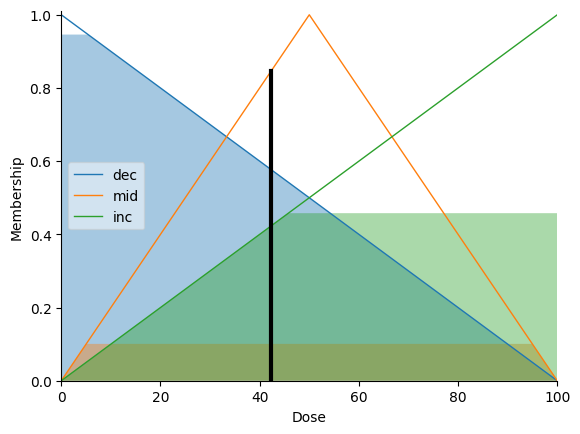

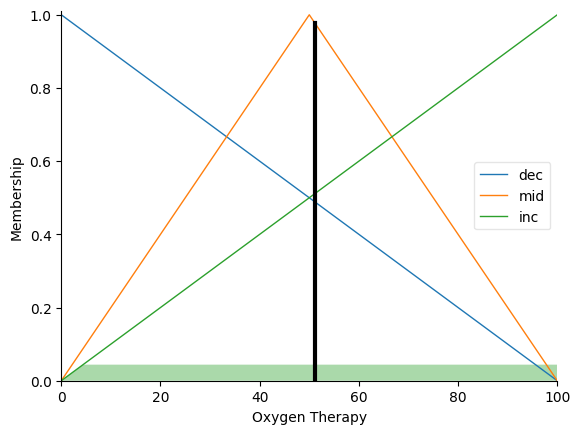

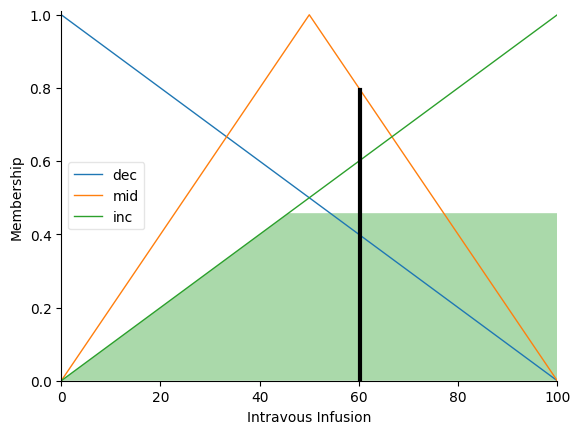

In [43]:
tipping_ctrl=ctrl.ControlSystem([rule1,rule2,rule3,rule4,rule5,rule6,rule7,rule8,rule9,rule10,rule11,rule12])
tipping=ctrl.ControlSystemSimulation(tipping_ctrl)
tipping.input['Heart Rate']=400
tipping.input['Blood Pressure']=80
tipping.input['Body Temperature']=60
tipping.input['Oxygen Saturation']=60
tipping.input['Blood Sugar Level']=60
tipping.compute()
print(tipping.output['Dose'])
print(tipping.output['Oxygen Therapy'])
print(tipping.output['Intravous Infusion'])
dose.view(sim=tipping)
oxym.view(sim=tipping)
infu.view(sim=tipping)